In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/kongruksiamza/MachineLearning/refs/heads/master/Linear%20Regression/Weather.csv')
print(df.shape)

(119040, 31)


/var/folders/ll/lryxwcm9653_rb8kx8rg3tz40000gn/T/ipykernel_33510/3321762733.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/kongruksiamza/MachineLearning/refs/heads/master/Linear%20Regression/Weather.csv')


In [17]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


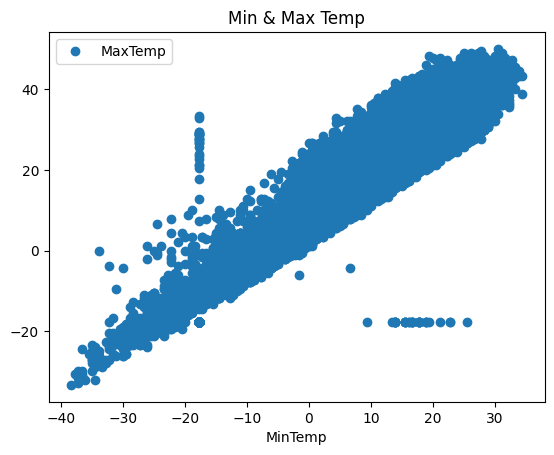

In [18]:
df.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('Min & Max Temp')
plt.show()

In [19]:
print(df.describe())

                 STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.0

In [20]:
df['MinTemp']

0         22.222222
1         21.666667
2         22.222222
3         22.222222
4         21.666667
            ...    
119035    18.333333
119036    18.333333
119037    18.333333
119038    18.333333
119039    17.222222
Name: MinTemp, Length: 119040, dtype: float64

In [21]:
#prepare data
x = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1) #reshape(:,np.newaxis)

x

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [22]:
#split_test_train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_test.shape)
print(x_train.shape)

(23808, 1)
(95232, 1)


In [23]:
#train
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

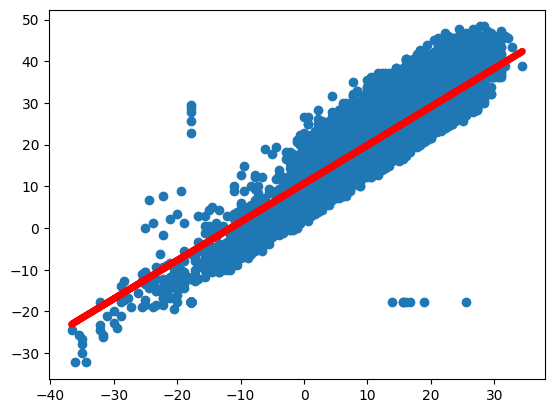

In [24]:
#test
y_pred = model.predict(x_test)
y_pred

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,'-r',linewidth=5)
plt.show()

<bound method NDFrame.head of         Actually  Predicted
0      28.888889  33.670351
1      31.111111  30.091251
2      27.222222  26.512151
3      28.888889  31.113851
4      23.333333  15.774852
...          ...        ...
23803  32.777778  32.136451
23804  32.222222  29.068651
23805  31.111111  32.647751
23806  31.111111  30.602551
23807  36.666667  31.625151

[23808 rows x 2 columns]>
(23808, 2)


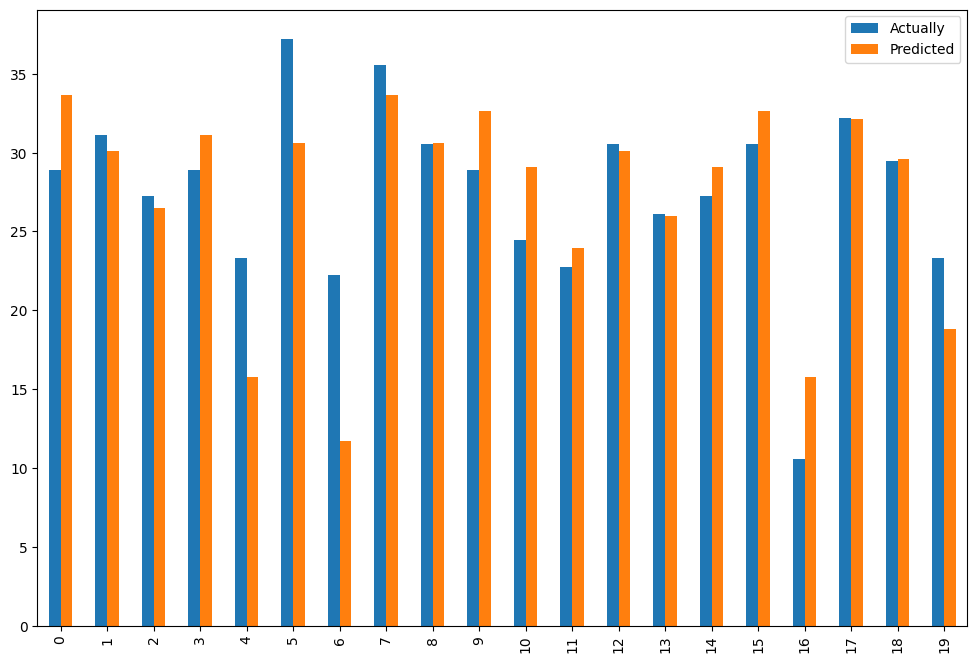

In [25]:
#evaluation
compare = pd.DataFrame({'Actually':y_test.flatten(), 'Predicted':y_pred.flatten()}) #flatten : 2D to 1D
print(compare.head)
print(compare.shape)

df1 = compare.head(20)
df1.plot(kind='bar', figsize=(12,8))
plt.show()


In [30]:
print('MAE = ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE = ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE = ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  3.199329178378236
MSE =  17.631568097567968
RMSE =  4.198996082109147
